In [6]:
import pandas as pd
species_info = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")

In [10]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

In [14]:
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [16]:
print(observations.value_counts())

scientific_name                      park_name                            observations
Poa compressa                        Great Smoky Mountains National Park  80              2
Salix exigua                         Yosemite National Park               186             2
Eleocharis palustris                 Great Smoky Mountains National Park  62              2
Potentilla norvegica                 Yosemite National Park               148             2
Spilogale putorius                   Yellowstone National Park            256             2
                                                                                         ..
Entodon sullivantii                  Yosemite National Park               165             1
                                     Yellowstone National Park            237             1
                                     Great Smoky Mountains National Park  64              1
                                     Bryce National Park                  85         

In [46]:
print(species_info.head())
print(species_info.dtypes)

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


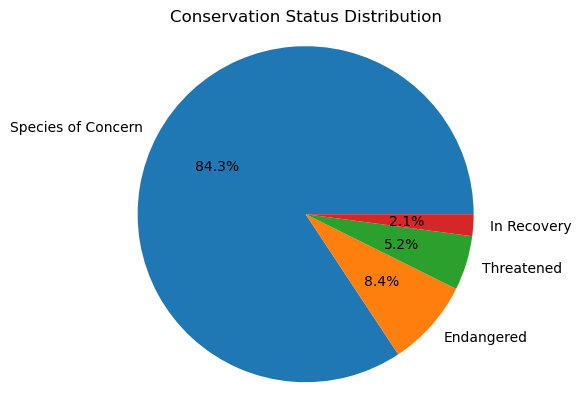

In [66]:
cons_status = species_info.conservation_status
status_counts = cons_status.value_counts()


plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%')
plt.title('Conservation Status Distribution')
plt.axis('equal')

plt.show()

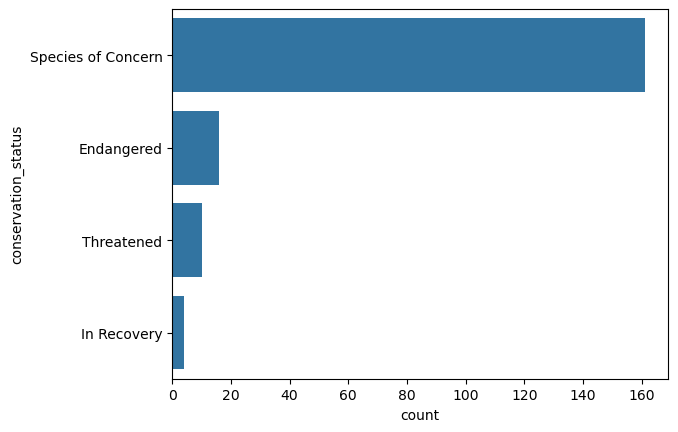

In [64]:
sns.countplot(cons_status)
plt.show()


In [86]:
print(f"number of species_info:{species_info.scientific_name.nunique()}")
print(f"nnumber of categories:{species_info.category.nunique()}")
print(f"categories:{species_info.category.unique()}")
species_info.groupby("category").size()

number of species_info:5541
nnumber of categories:7
categories:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [96]:
print(f"number of parks:{observations.park_name.nunique()}")
print(f"unique parks:{observations.park_name.unique()}")
print(f"number of observations:{observations.observations.sum()}")

number of parks:4
unique parks:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
number of observations:3314739


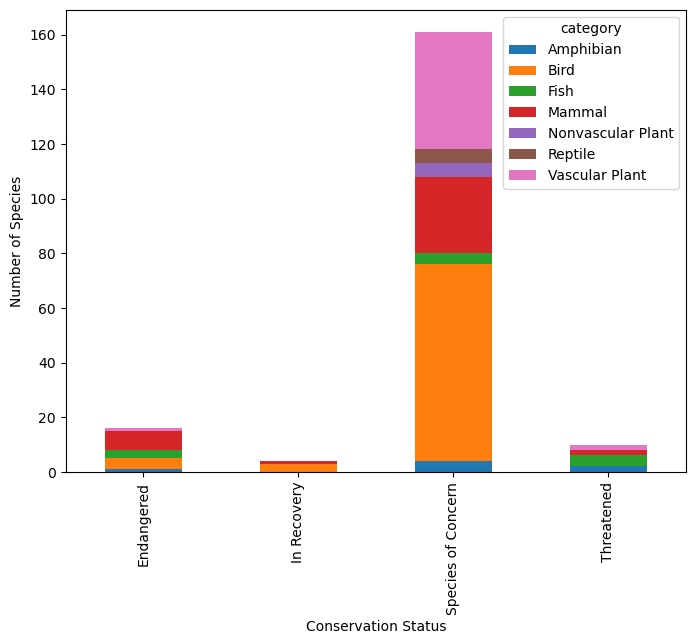

In [102]:
conservationCategory = species_info[species_info.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");